## Load Data

In [104]:
# All import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('dataset/train.csv')
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


## Data Visualization & Analysis

In [5]:
# % of Phones which support 3G
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values

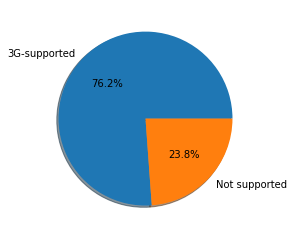

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

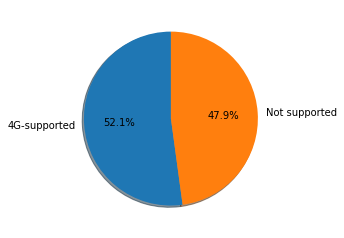

In [13]:
# % of Phones which support 4G
labels4g = ["4G-supported",'Not supported']
values4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Text(0.5, 0, 'MegaPixels')

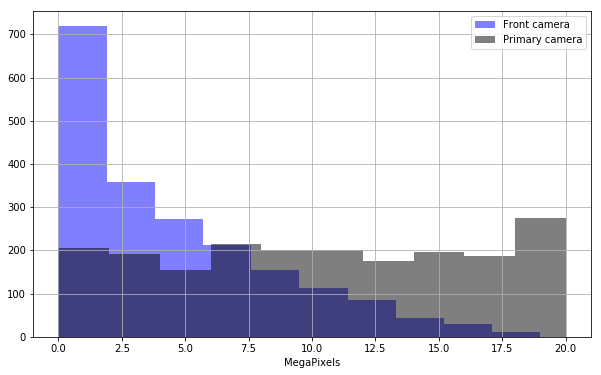

In [29]:
# No of Phones vs Camera megapixels of front and primary camera
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='black',label='Primary camera')
plt.legend(loc='best')
plt.xlabel('MegaPixels')

## split the data into train and test set

In [30]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Creating & Training Linear Regression Model

In [38]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)
lrm.score(X_test,y_test)

0.9176776542622697

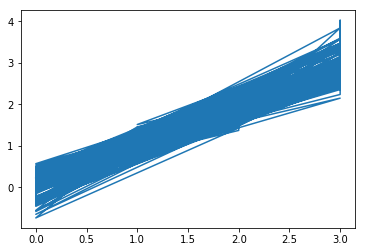

In [103]:
# result of Linear regression
y_pred=lrm.predict(X_test)
plt.plot(y_test,y_pred)

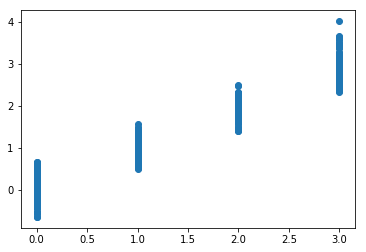

In [88]:
plt.scatter(y_test,y_pred)

## Creating & Training Logistic Regression Model

In [134]:
#X1=df.drop(['price_range','sc_h','sc_w','px_height','px_width','mobile_wt','m_dep','talk_time'],axis=1)=0.715
#X1=df.drop(['price_range','sc_h','sc_w','px_height','px_width','mobile_wt','m_dep'],axis=1)=0.7375
#X1=df.drop(['price_range','sc_h','sc_w','px_height','px_width','mobile_wt'],axis=1)=0.7375
X1=df.drop(['price_range','sc_h','sc_w','px_height','px_width','mobile_wt'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
Logistic = LogisticRegression()
Logistic.fit(X_train,y_train)
Logistic.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7575

## Creating & Training Decision Tree Model

In [106]:
Tree_Model = DecisionTreeClassifier()
Tree_Model.fit(X_train,y_train)
Tree_Model.score(X_test,y_test)

0.8775

In [109]:
# result of  Decision Tree Model
y_tree_predict=Tree_Model.predict(X_test)
y_tree_predict

array([0, 1, 0, 3, 1, 1, 2, 3, 3, 0, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 1, 0,
       0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 3, 1, 1, 3, 2,
       1, 3, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 3, 3, 0, 3, 0, 3,
       0, 1, 0, 1, 3, 0, 1, 0, 1, 3, 3, 2, 3, 3, 2, 3, 2, 0, 1, 1, 3, 0,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 1, 0, 2, 2, 1, 0, 1, 1, 0, 3, 3,
       1, 1, 2, 3, 0, 1, 2, 3, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 3, 2, 1,
       2, 3, 2, 3, 2, 1, 3, 3, 0, 3, 2, 0, 1, 0, 1, 3, 2, 2, 1, 3, 3, 2,
       3, 2, 3, 3, 3, 1, 2, 0, 3, 3, 3, 2, 0, 1, 3, 2, 2, 0, 3, 0, 0, 3,
       3, 1, 0, 3, 2, 1, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 3, 2, 0, 3,
       1, 1, 0, 1, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3, 0, 1, 2, 1, 2, 3,
       3, 1, 0, 0, 0, 0, 3, 1, 3, 1, 3, 0, 0, 0, 2, 3, 1, 1, 3, 0, 2, 1,
       3, 2, 2, 3, 3, 2, 2, 3, 0, 3, 2, 2, 3, 0, 2, 1, 0, 3, 2, 0, 1, 3,
       3, 2, 1, 0, 3, 2, 1, 2, 3, 1, 2, 0, 3, 3, 0, 1, 3, 2, 2, 1, 2, 3,
       3, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 3, 1, 1, 2,

<BarContainer object of 400 artists>

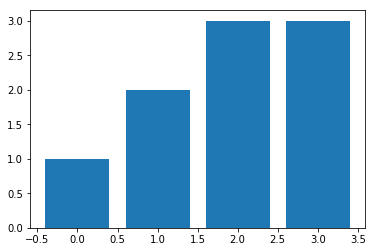

In [112]:
plt.bar(y_test,y_tree_predict)